In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from os.path import join

from eyefeatures.preprocessing.fixation_extraction import IVT, IDT, IHMM

DATA_PATH = join('..', 'data', 'gazes')

In [2]:
def remove_points(df, x_min, x_max, y_min, y_max):
    df = df[df['norm_pos_x'] <= x_max]
    df = df[df['norm_pos_x'] >= x_min]
    df = df[df['norm_pos_y'] >= y_min]
    df = df[df['norm_pos_y'] <= y_max]
    return df

data = pd.concat([pd.read_excel(join(DATA_PATH, 'itog_gaze_1.xlsx')),
                  pd.read_excel(join(DATA_PATH, 'itog_gaze_2.xlsx'))], axis=0)

data.drop(['world_index', 'confidence', 'base_data'], axis=1, inplace=True)
data = remove_points(data, -1, 1, -1, 1)

In [3]:
x = 'norm_pos_x'
y = 'norm_pos_y'
t = 'gaze_timestamp'

In [4]:
len(data)

278413

In [5]:
ivt = IVT(x=x, y=y, t=t, pk=['Participant', 'tekst'], threshold=5.0,
          distance="manhattan")
ivt_data = ivt.transform(data)
ivt_data

,Participant,tekst,norm_pos_x,norm_pos_y,start_time,end_time,distance_min,distance_max,diameters,centers,duration,saccade_duration,saccade_length,saccade_angle,saccade2_angle
0,1,1,0.242478,0.508895,317242.694809,317242.902920,0.000250,0.016098,0.019670,"[0.24171167850912312, 0.5106965050960497]",0.208112,0.000000,0.000000,0.000000,0.000000
1,1,1,0.243361,0.420827,317242.913454,317243.364583,0.000012,0.022712,0.052256,"[0.2438423730756627, 0.4298150999186987]",0.451129,0.010533,0.088952,270.574845,24.905063
2,1,1,0.203022,0.505477,317243.376751,317243.614467,0.000118,0.023576,0.019930,"[0.20268168358791305, 0.5044650420253163]",0.237715,0.012168,0.124989,115.479908,63.234734
3,1,1,0.301861,0.503259,317243.633292,317244.088560,0.000200,0.033958,0.075314,"[0.30140551666665916, 0.5057991379294293]",0.455268,0.018825,0.101057,358.714643,91.287125
4,1,1,0.301874,0.084666,317244.127373,317244.261180,0.000119,0.010765,0.016585,"[0.3010872148195358, 0.08525899343264598]",0.133807,0.038813,0.418607,270.001768,189.198414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4857,2,37,0.364464,0.689684,1830.243028,1830.243028,0.035883,0.035883,0.000000,"[0.364464375599816, 0.6896844736652099]",0.000000,0.012657,0.039669,54.326308,154.044795
4858,2,37,0.392382,0.852691,1830.383403,1830.420315,0.006923,0.060376,0.017766,"[0.39107147854992874, 0.8542203221656557]",0.036912,0.140375,0.190924,80.281512,4.752123
4859,2,37,0.360191,0.727955,1833.255635,1833.255635,0.024697,0.024697,0.000000,"[0.3601910775488069, 0.7279551304812912]",0.000000,2.835320,0.156927,255.529390,184.144405
4860,2,37,0.348062,0.661388,1833.268271,1833.459384,0.000095,0.014323,0.013144,"[0.345999879396496, 0.6620568028673688]",0.191114,0.012635,0.078696,259.673795,223.787291


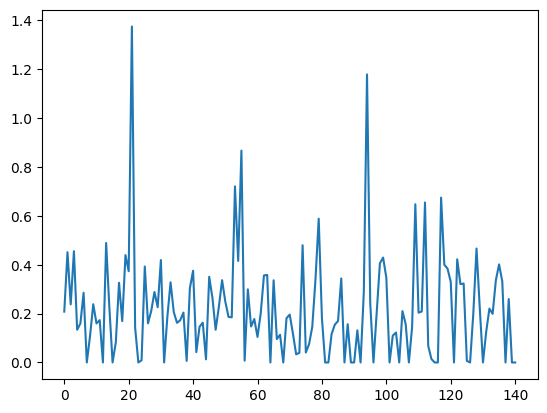

In [6]:
plt.plot(ivt_data[(ivt_data["Participant"] == 1) & (ivt_data["tekst"] == 1)].duration);

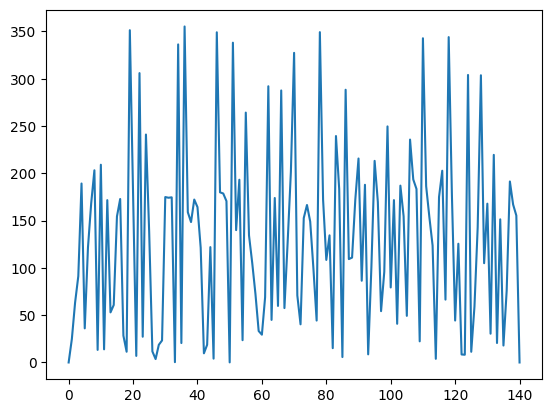

In [7]:
plt.plot(ivt_data[(ivt_data["Participant"] == 1) & (ivt_data["tekst"] == 1)].saccade2_angle);

In [8]:
idt = IDT(x=x, y=y, t=t, pk=['Participant', 'tekst'], min_duration=0.05, max_dispersion=0.10, max_duration=0.80,
          distance="euc")
idt_data = idt.transform(data)
idt_data

,Participant,tekst,norm_pos_x,norm_pos_y,start_time,end_time,distance_min,distance_max,dispersion,diameters,centers,duration,saccade_duration,saccade_length,saccade_angle,saccade2_angle
0,1,1,0.244605,0.470766,317242.694809,317243.122744,0.000102,0.054160,0.096887,0.096042,"[0.24191889044373927, 0.4716737667608655]",0.427935,0.000000,0.000000,0.000000,0.000000
1,1,1,0.239912,0.408509,317243.134881,317243.364583,0.000008,0.008555,0.017345,0.014731,"[0.2418517631003838, 0.411158012138813]",0.229702,0.012137,0.062434,265.689059,5.584912
2,1,1,0.237771,0.504809,317243.376751,317243.864590,0.000113,0.041256,0.096311,0.076509,"[0.23675385224251766, 0.5032409592688183]",0.487839,0.012168,0.096324,91.273971,87.545527
3,1,1,0.335406,0.502797,317243.877086,317244.093894,0.000248,0.048200,0.076882,0.042498,"[0.31786985368735976, 0.5043784822524302]",0.216807,0.012496,0.097656,358.819498,87.228667
4,1,1,0.305275,0.066634,317244.121307,317244.440016,0.000080,0.059247,0.078744,0.069841,"[0.31429410064682495, 0.07337035109364365]",0.318709,0.027413,0.437202,266.048165,27.217537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,2,37,0.276751,0.946098,1826.158245,1826.388844,0.000161,0.039731,0.086826,0.061715,"[0.2708384782298001, 0.9421287465944488]",0.230599,0.010726,0.084689,45.518326,58.773902
3942,2,37,0.347960,0.666578,1829.481473,1830.236747,0.000000,0.026087,0.056884,0.052254,"[0.34637178266225277, 0.6742616725617268]",0.755274,3.092629,0.288448,284.292228,181.143078
3943,2,37,0.348366,0.665105,1833.255635,1833.459384,0.000094,0.048887,0.073940,0.073702,"[0.3534048323375085, 0.6917344581372049]",0.203749,3.018889,0.001528,285.435306,195.437375
3944,2,37,0.373471,0.623112,1833.471612,1834.265731,0.000062,0.007909,0.016915,0.015410,"[0.3689164035529506, 0.6230992256881791]",0.794119,0.012228,0.048924,300.872681,177.428628


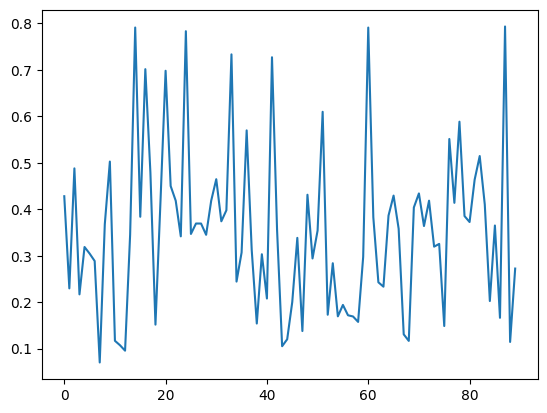

In [9]:
plt.plot(idt_data[(idt_data["Participant"] == 1) & (idt_data["tekst"] == 1)].duration);

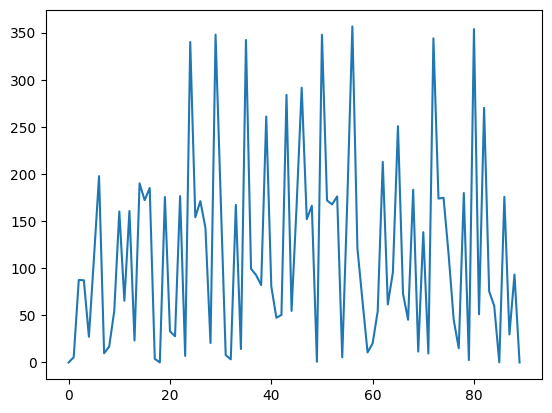

In [10]:
plt.plot(idt_data[(idt_data["Participant"] == 1) & (idt_data["tekst"] == 1)].saccade2_angle);

In [11]:
ihmm = IHMM(x=x, y=y, t=t, pk=['Participant', 'tekst'], fix2sac=0.10, sac2fix=0.10, distrib_params='auto',
            distance='euc')
ihmm_data = ihmm.transform(data)
ihmm_data

,Participant,tekst,norm_pos_x,norm_pos_y,start_time,end_time,distance_min,distance_max,diameters,centers,duration,saccade_duration,saccade_length,saccade_angle,saccade2_angle
0,1,1,0.244068,0.461838,317242.694809,317243.198904,0.000102,0.054160,0.113273,"[0.2390136104280165, 0.4628596674354384]",0.504096,0.000000,0.000000,0.000000,0.000000
1,1,1,0.279185,0.295777,317243.210370,317245.461811,0.000062,0.214331,0.524401,"[0.2646805580458299, 0.2559104920179531]",2.251441,0.011465,0.169734,281.940319,146.914755
2,1,1,0.221764,0.147312,317245.475675,317246.013234,0.000099,0.152063,0.202206,"[0.2632045227137172, 0.09303384759459733]",0.537558,0.013864,0.159182,248.855074,4.839822
3,1,1,0.299071,0.411597,317246.025460,317247.270094,0.000060,1.079213,0.914543,"[0.11606804163454428, 0.09987164557736877]",1.244634,0.012227,0.275359,73.694896,158.043054
4,1,1,0.288847,0.514909,317247.283117,317248.061340,0.000070,0.051833,0.126025,"[0.2976598384426734, 0.5138762888266086]",0.778223,0.013022,0.103817,95.651842,78.564097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2693,2,37,0.204218,0.880160,1825.916632,1825.931162,0.000198,0.001513,0.000214,"[0.20422412379289098, 0.8801793949111621]",0.014530,0.012090,0.032594,238.692771,254.500203
2694,2,37,0.304696,0.773136,1825.943843,1830.048411,0.000064,1.174208,1.234600,"[0.17333309358860038, 0.35585611976536313]",4.104568,0.012681,0.146798,313.192974,157.894089
2695,2,37,0.348448,0.659672,1830.067362,1830.101175,0.000117,0.002048,0.002223,"[0.34853374573647944, 0.6594991209038312]",0.033813,0.018952,0.121607,291.087063,168.418097
2696,2,37,0.348555,0.659034,1830.113153,1830.159630,0.000150,0.001249,0.002667,"[0.3487717236529573, 0.659339986108705]",0.046478,0.011977,0.000647,279.505160,214.197232


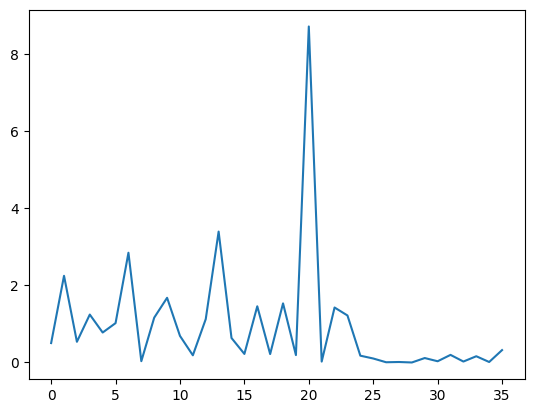

In [12]:
plt.plot(ihmm_data[(ihmm_data["Participant"] == 1) & (ihmm_data["tekst"] == 1)].duration);

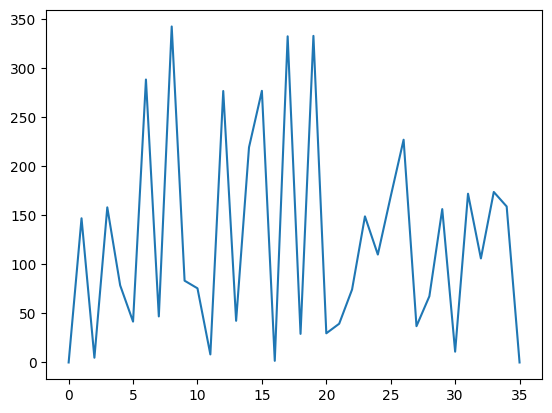

In [13]:
plt.plot(ihmm_data[(ihmm_data["Participant"] == 1) & (ihmm_data["tekst"] == 1)].saccade2_angle);